**Step 1: Import libraries**

In [47]:
# Used for load MNIST dataset and normalize data 
import tensorflow as tf
# Plotting library
import matplotlib.pyplot as plt
# Scientific and vector computation for python
import numpy as np
# Used for display confusion matrix
from sklearn import metrics
# Used for load logistic regression's model
from sklearn.linear_model import LogisticRegression
# Statistical data visualization
import seaborn as sns

In [23]:
# Filtering warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Step 2: Load data and data cleaning**

In [24]:
# load mnist data
mnist = tf.keras.datasets.mnist

In [25]:
# divide dataset to two seperated dataset: training set and test set 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
# data normalization
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [32]:
print('*training and test set dimension*')
print('X_train: {0} \ny_train: {1}'.format(x_train.shape, y_train.shape))
print('X_test: {0} \ny_test: {1}'.format(x_test.shape, y_test.shape))

*training and test set dimension*
X_train: (60000, 784) 
y_train: (60000,)
X_test: (10000, 784) 
y_test: (10000,)


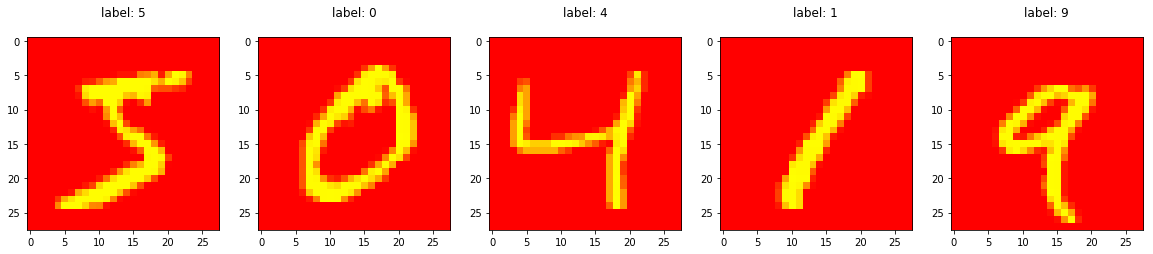

In [33]:
# display some data and their labels
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.autumn)
    plt.title('label: %i\n' % label)

In [34]:
# convert x_train and x_test dimension from (60000, 28, 28) to (60000, 784)
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

**Step 3: Load data in logistic regression model**

In [35]:
# make an instance of the Model
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver='lbfgs')

In [36]:
# fitting logistic regression on training set
logisticRegr.fit(x_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**Step 4: Evaluate**

In [37]:
# predict first data in test set
logisticRegr.predict(x_test[0].reshape(1,-1))

array([7], dtype=uint8)

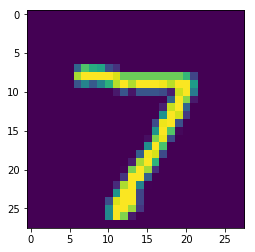

In [60]:
# display first data's plot
first = x_test[0].reshape(28, 28)
first.shape
plt.imshow(first)

In [61]:
# accuracy
score = logisticRegr.score(x_test, y_test)
print(score)

0.9155


In [62]:
# get all test prediction
predictions = logisticRegr.predict(x_test)

In [63]:
# load confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

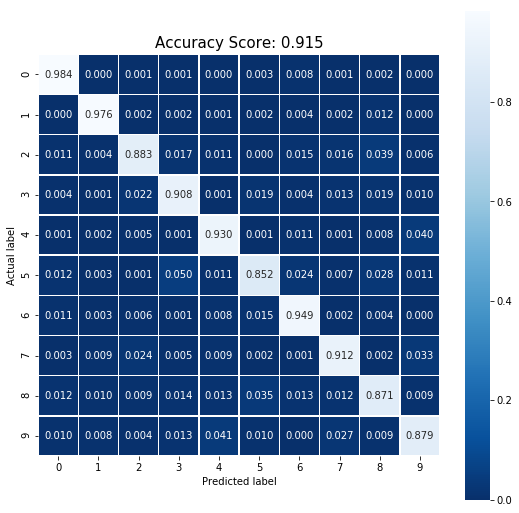

In [64]:
# illustrate confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

**Step 5: Display Misclassified images with Predicted Labels**

In [65]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

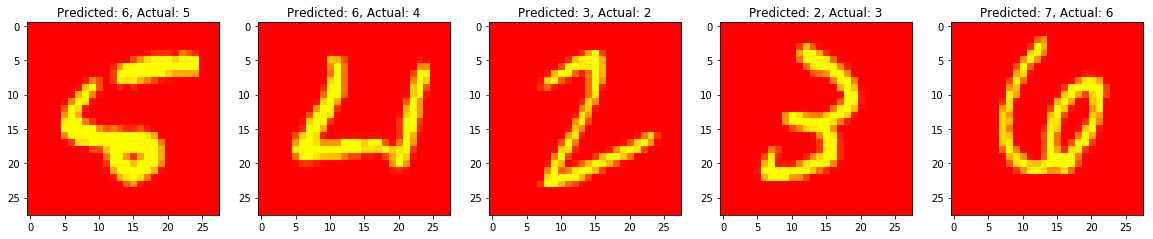

In [67]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.autumn)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]))

**Step 6: Checking Performance Based on Training Set Size (100, 1000, 60000)**

In [45]:
regr = LogisticRegression(solver = 'lbfgs')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


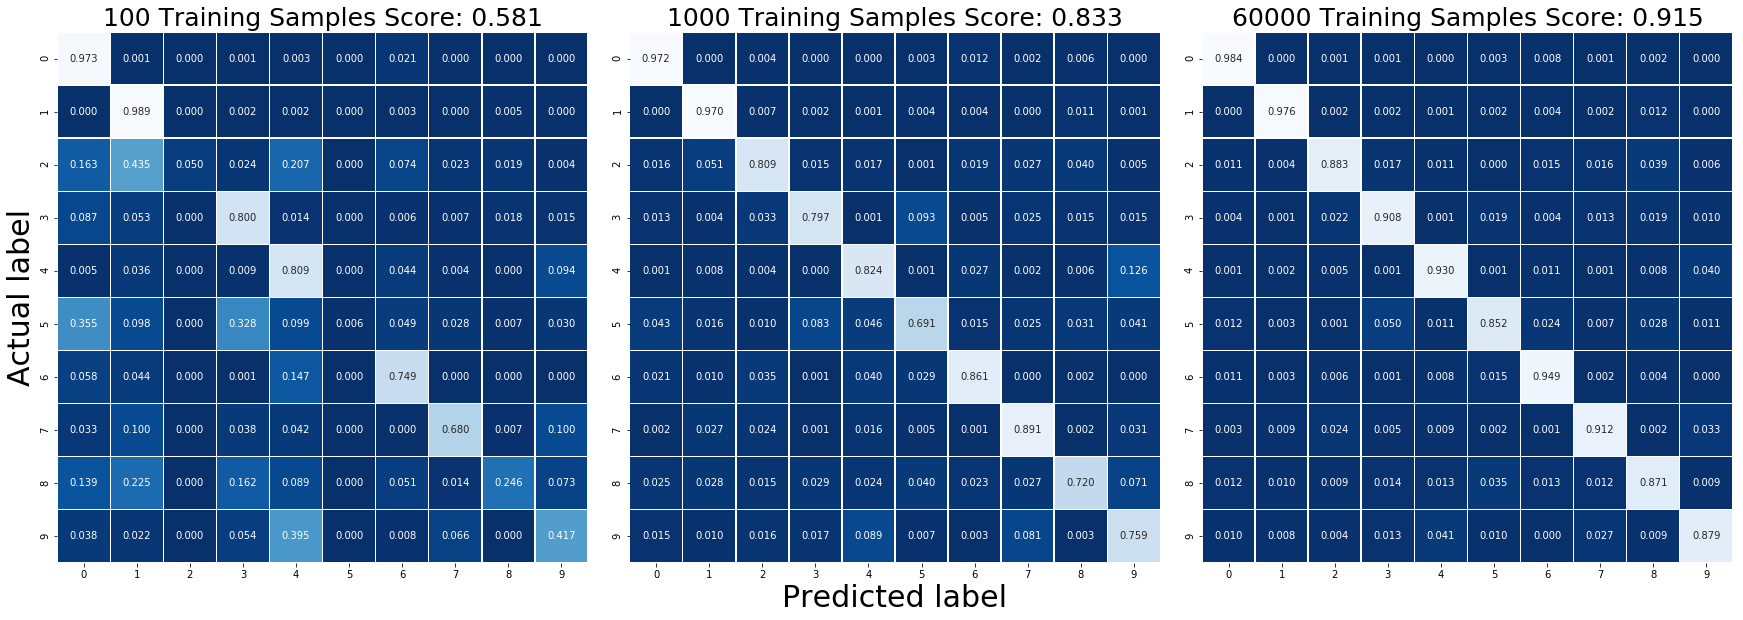

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    train_img = x_train[:sample_size].reshape(sample_size, 784)
    train_lbl = y_train[:sample_size]
    regr.fit(train_img, train_lbl)
    predicted = regr.predict(x_test)
    cm = metrics.confusion_matrix(y_test, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(x_test, y_test)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);